# UmojaHackGhana 2020
## African Institute for Mathematical sciences, Ghana
## Team XYZ
1. Gedeon Muhawenayo -> microprocessors
2. Emmanuel Ahenkan -> EmmanuelAhenkan
3. Armand Bandiang Massoua -> bandiang
4. Abubakr Babiker -> Bakri

The winning model was Neural networks with two layers (and tuned hyper parameters). 

<font color='red'>Make sure that these versions are the same</font>
* Numpy : 1.17.3
* Sklearn : 0.20.2
* Pandas : 0.23.3


In [1]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [87]:
print("Numpy version "np.__version__)
print("Sklearn version",sklearn.__version__)
print("Pandas version",pd.__version__)

1.17.3
0.20.2
0.23.3


In [2]:
#import data
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [3]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [4]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [5]:
train.shape

(2154048, 19)

In [6]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
user_id           object
REGION            object
TENURE            object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG               object
REGULARITY        int64
TOP_PACK          object
FREQ_TOP_PACK     float64
CHURN             int64
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [7]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [8]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [9]:
test.shape

(380127, 18)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
user_id           380127 non-null object
REGION            230399 non-null object
TENURE            380127 non-null object
MONTANT           247072 non-null float64
FREQUENCE_RECH    247072 non-null float64
REVENUE           252754 non-null float64
ARPU_SEGMENT      252754 non-null float64
FREQUENCE         252754 non-null float64
DATA_VOLUME       193087 non-null float64
ON_NET            241613 non-null float64
ORANGE            222897 non-null float64
TIGO              153126 non-null float64
ZONE1             29861 non-null float64
ZONE2             24076 non-null float64
MRG               380127 non-null object
REGULARITY        380127 non-null int64
TOP_PACK          221348 non-null object
FREQ_TOP_PACK     221348 non-null float64
dtypes: float64(12), int64(1), object(5)
memory usage: 52.2+ MB


In [11]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [12]:
submission.shape

(380127, 2)

In [13]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

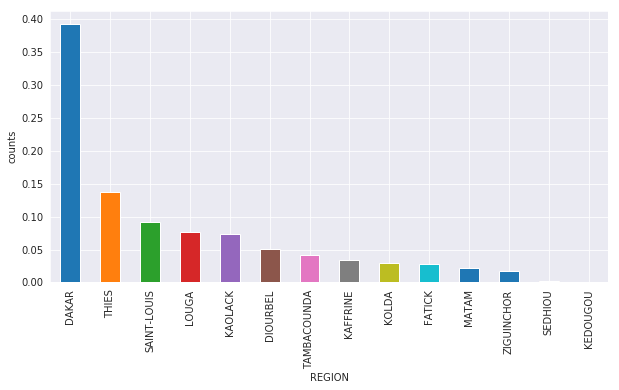

In [14]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

In [15]:
plt.figure(figsize=(12,8))
train.groupby("REGION")["CHURN"].mean()


REGION
DAKAR          0.019235
DIOURBEL       0.028097
FATICK         0.014196
KAFFRINE       0.007188
KAOLACK        0.023436
KEDOUGOU       0.042157
KOLDA          0.010763
LOUGA          0.015951
MATAM          0.020080
SAINT-LOUIS    0.012679
SEDHIOU        0.043604
TAMBACOUNDA    0.015361
THIES          0.016301
ZIGUINCHOR     0.027432
Name: CHURN, dtype: float64

<Figure size 864x576 with 0 Axes>

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

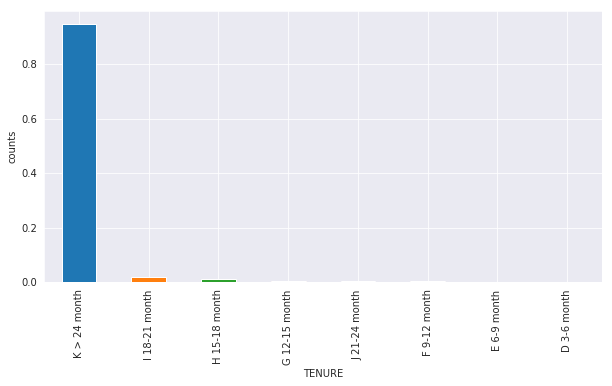

In [16]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

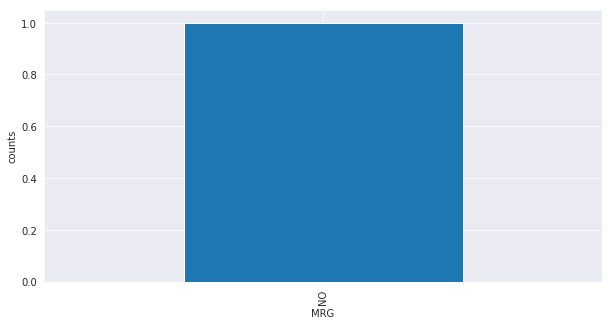

In [17]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d                        317802
On net 200F=Unlimited _call24H               152295
Data:490F=1GB,7d                             115180
Data: 100 F=40MB,24H                          84649
Mixt 250F=Unlimited_call24H                   67512
MIXT:500F= 2500F on net _2500F off net;2d     64412
Data:1000F=2GB,30d                            59770
All-net 500F =2000F_AllNet_Unlimited          46890
Jokko_Daily                                   45036
Data: 200 F=100MB,24H                         42841
IVR Echat_Daily_50F                           28658
On-net 500=4000,10d                           26733
On-net 500F_FNF;3d                            22332
Data:200F=Unlimited,24H                       22043
MIXT: 200mnoff net _unl on net _5Go;30d       19318
On-net 1000F=10MilF;10d                       18454
VAS(IVR_Radio_Daily)                          14686
Data:1000F=5GB,7d                             14629
Twter_U2opia_Daily                            12060
All-net 600F

Text(0.5, 0, 'TOP_PACK')

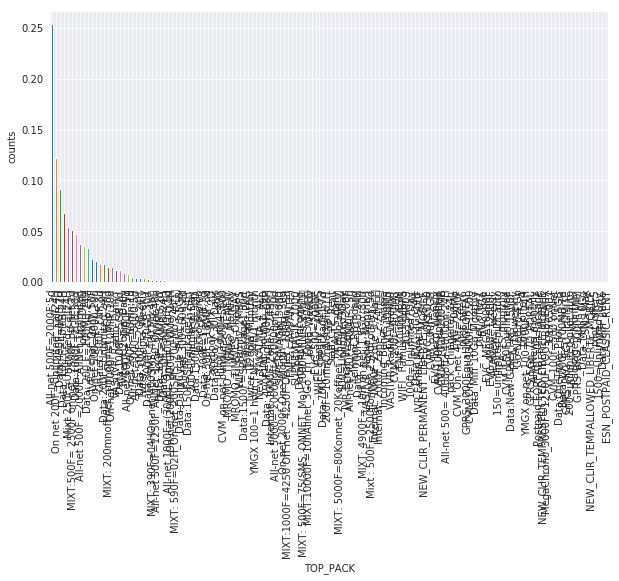

In [18]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

## Convert categorical representation for TOP_PACK and REGION to one hot encoding

In [19]:
data = pd.concat((train, test))
data.reset_index(inplace=True)

In [20]:
len(train["TOP_PACK"].unique())
top_pack_one_hot = pd.get_dummies(data["TOP_PACK"],prefix="TOP_PACK",sparse=True)
region_one_hot = pd.get_dummies(data["REGION"],prefix="REGION",sparse=True)


In [21]:
train_pack_one_hot = top_pack_one_hot.iloc[:2154048]
test_pack_one_hot = top_pack_one_hot.iloc[2154048:]

train_region_one_hot = region_one_hot.iloc[:2154048]
test_region_one_hot = region_one_hot.iloc[2154048:]


In [22]:
test_pack_one_hot.shape

(380127, 142)

In [23]:
extra_features = pd.concat((train_pack_one_hot,train_region_one_hot),axis=1)
test_extra_features = pd.concat((test_pack_one_hot,test_region_one_hot),axis=1)

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

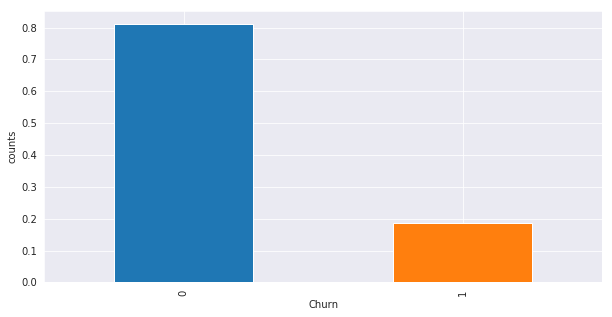

In [24]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [25]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [26]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [27]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [28]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [29]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK',"ZONE1","ZONE2"], inplace=True) #drop these columns

In [30]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,54,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,17,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,11,2.0,0


In [31]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK',"ZONE1","ZONE2"], inplace=True)

In [32]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,42,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,41,1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,57,22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [33]:
#Fill NAs for train data

In [34]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
#train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
#train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)
train['TENURE'].fillna("NAN", inplace=True)

In [35]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,54,8.000000,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,4,9.272461,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,17,1.000000,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,62,11.000000,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,11,2.000000,0


In [36]:
train.isna().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [37]:
#Fill NAs for test data

In [38]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
#test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
#test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)
test['TENURE'].fillna("NAN", inplace=True)


In [39]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,42,5.000000
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,41,1.000000
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,57,22.000000
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,9,9.261584
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,10,9.261584


In [40]:
test.isna().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [41]:
test.shape

(380127, 13)

## Machine Learning

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [43]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 12)
(2154048,)
(380127, 12)


In [44]:
x = pd.concat((x,extra_features),axis=1)
test_extra_features.reset_index(inplace=True)
test = pd.concat((test, test_extra_features),axis=1)

In [45]:
test.shape

(380127, 169)

In [46]:
#Split training data into train and test split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1507833, 168)
(1507833,)
(646215, 168)
(646215,)


In [48]:
#Further split X_train and y_train into train and validation sets

In [49]:
#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

In [50]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)

train
(1507833, 168)
(1507833,)
+++++++
test
(646215, 168)
(646215,)


In [51]:
#Standardize numeric columns

In [52]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK']

In [53]:
scaler = StandardScaler()

In [54]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [55]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
1688519,K > 24 month,2.349350,4.813555,2.369140,2.368971,4.348186,-0.000587,7.923757,0.333678,-0.226591,...,0,0,0,0,0,0,0,0,0,0
1639889,K > 24 month,0.255895,3.223659,0.306102,0.306270,3.846678,0.071149,-0.385613,-0.587967,0.000139,...,0,0,0,0,0,0,0,0,0,0
444059,K > 24 month,-0.790832,-0.984888,-0.769947,-0.770122,-1.084819,-0.319179,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0
1424683,K > 24 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.244380,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0
1046167,K > 24 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [57]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
417912,K > 24 month,5.489531,0.885577,5.559411,5.559247,1.004798,-0.162195,1.499489,6.791548,3.855376,...,0,0,0,1,0,0,0,0,0,0
1380278,K > 24 month,-0.354696,-0.423749,-0.343417,-0.343250,-0.583311,-0.000587,-0.355486,-0.034980,-0.400821,...,0,0,0,0,0,0,0,0,1,0
657158,K > 24 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0
228934,I 18-21 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0
2020145,K > 24 month,2.192340,0.417961,2.147516,2.147345,0.252536,-0.000587,0.119376,0.632418,-0.500381,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,...,0,0,0,0,0,0,0,0,1,0
1,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,...,0,0,0,0,0,0,0,0,0,0
2,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,...,0,0,0,0,0,0,0,0,0,0
3,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,...,0,0,0,0,0,0,0,0,0,0
4,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,...,0,0,0,0,0,0,0,0,0,0
5,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,0.00000,95.193008,23.052088,...,0,0,0,0,0,0,0,0,0,0
6,K > 24 month,6500.000000,12.000000,7000.000000,2333.000000,13.000000,3346.095454,338.00000,122.000000,25.000000,...,0,0,0,0,0,0,0,0,0,0
7,K > 24 month,1000.000000,2.000000,1000.000000,333.000000,2.000000,3346.095454,74.00000,15.000000,3.000000,...,0,0,0,0,0,0,0,0,0,0
8,K > 24 month,4000.000000,8.000000,4000.000000,1333.000000,10.000000,3346.095454,9.00000,106.000000,5.000000,...,0,0,0,0,0,0,0,0,0,0
9,K > 24 month,3000.000000,5.000000,3006.000000,1002.000000,8.000000,4729.000000,1.00000,1.000000,23.052088,...,0,0,0,0,0,0,0,0,1,0


In [59]:
test[num_cols] = scaler.transform(test[num_cols])

In [60]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,K > 24 month,-0.093014,-0.610795,-0.087499,-0.087332,-0.750480,-0.002704,0.143765,-0.537118,-0.450601,...,0,0,0,0,0,0,0,0,1,0
1,I 18-21 month,-0.912950,-0.891365,-0.884939,-0.884773,-0.917650,-0.309504,0.001459,-0.607036,-0.001284,...,0,0,0,0,0,0,0,0,0,0
2,K > 24 month,-0.389587,1.259670,-0.360478,-0.360653,1.004798,0.393024,-0.398525,-0.594323,-0.450601,...,0,0,0,0,0,0,0,0,0,0
3,K > 24 month,-0.001433,-0.001037,-0.002248,-0.002248,-0.001732,-0.002704,0.001459,-0.001973,-0.001284,...,0,0,0,0,0,0,0,0,0,0
4,K > 24 month,-0.001433,-0.001037,-0.002248,-0.002248,-0.001732,-0.002704,0.001459,-0.001973,-0.001284,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Encode the TENURE column

In [62]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [63]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [64]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [65]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
1688519,7,2.349350,4.813555,2.369140,2.368971,4.348186,-0.000587,7.923757,0.333678,-0.226591,...,0,0,0,0,0,0,0,0,0,0
1639889,7,0.255895,3.223659,0.306102,0.306270,3.846678,0.071149,-0.385613,-0.587967,0.000139,...,0,0,0,0,0,0,0,0,0,0
444059,7,-0.790832,-0.984888,-0.769947,-0.770122,-1.084819,-0.319179,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0
1424683,7,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.244380,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0
1046167,7,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-0.000538,0.000139,...,0,0,0,0,0,0,0,0,0,0


In [69]:
rand = MLPClassifier(hidden_layer_sizes=(100,100),
                     activation='tanh',
                     solver='adam',
                     batch_size='auto',
                     learning_rate='adaptive',
                     learning_rate_init=0.001,
                     power_t=0.5, max_iter=10,
                     shuffle=True,
                     random_state=0,
                     verbose=True,
                     momentum=0.9,
                     nesterovs_momentum=True,
                     early_stopping=True,
                    )

In [70]:
#Fit model on data
randmodel = rand.fit(X_train,y_train)

Iteration 1, loss = 0.26051033
Validation score: 0.876797
Iteration 2, loss = 0.25549448
Validation score: 0.878296
Iteration 3, loss = 0.25456397
Validation score: 0.878555
Iteration 4, loss = 0.25399939
Validation score: 0.878508
Iteration 5, loss = 0.25365291
Validation score: 0.878595
Iteration 6, loss = 0.25346236
Validation score: 0.879503
Iteration 7, loss = 0.25332268
Validation score: 0.879384
Iteration 8, loss = 0.25319315
Validation score: 0.879623
Iteration 9, loss = 0.25307832
Validation score: 0.879503
Iteration 10, loss = 0.25295713
Validation score: 0.878701


In [71]:
#Predict on the X_test data 
randpred = randmodel.predict(X_test)

In [72]:
print("Acuracy")
accuracy_score(y_test, randpred)

Acuracy


0.8789984757394985

In [73]:
print("Recall")
recall_score(y_test, randpred)

Recall


0.6505133062548084

In [74]:
print("F1 Score")
f1_score(y_test, randpred)

F1 Score


0.6679209224300852

In [75]:
confusion_matrix(y_test, randpred)

array([[489386,  35946],
       [ 42247,  78636]])

In [76]:
# Making a submissio

In [77]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [79]:
test.drop(columns=["index"],inplace=True)

In [80]:
subpred = rand.predict_proba(test)

In [81]:
subpred

array([[9.98782146e-01, 1.21785449e-03],
       [9.53266781e-01, 4.67332193e-02],
       [9.99436796e-01, 5.63204469e-04],
       ...,
       [7.83125270e-01, 2.16874730e-01],
       [8.77595836e-01, 1.22404164e-01],
       [9.89046475e-01, 1.09535245e-02]])

In [82]:
submission["CHURN"] = subpred[:,1]

In [83]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.001218
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.046733
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.000563
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.396695
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.374223


In [84]:
submission.to_csv('proba_nn2l_tune_submission.csv', index=False)

In [ ]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go


In [ ]:
submission.shape

### Good Luck !!!